In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [211]:
df_sales=pd.read_csv(r"C:\Users\sroff\Documents\MMAI CURRICULUM\MBAN 6110 Data Sc 1\Assignment 1\sales_data.csv")
df_sales.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,942,945.000000,943.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_4,Region_5,NaN,NaN,2023-07-31
freq,30,112,NaN,NaN,2
mean,NaN,NaN,108.628011,10.200424,NaN
std,NaN,NaN,167.350086,3.247589,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,26.420000,8.000000,NaN
50%,NaN,NaN,64.640000,10.000000,NaN
75%,NaN,NaN,142.310000,12.000000,NaN


In [212]:
# Sorting the data based on product column
df_sales_p=df_sales.sort_values('Product',ascending=True)
df_sales_p

,Product,Region,Price,Units Sold,Sale Date
1023,Product_1,Region_7,62.99,13.0,2022-10-28
396,Product_1,Region_6,50.97,NaN,2023-02-01
83,Product_1,Region_3,72.55,17.0,2022-03-25
522,Product_1,Region_6,42.74,11.0,2023-06-07
807,Product_1,Region_7,79.99,6.0,2024-03-18
...,...,...,...,...,...
977,NaN,Region_2,14.33,11.0,2024-09-04
999,NaN,Region_7,10.80,8.0,2024-09-26
1006,NaN,NaN,292.85,9.0,2022-12-29
1016,NaN,NaN,200.61,12.0,2024-04-22


In [213]:
df_sales_p.dropna(subset='Product',inplace=True) # drop all rows with missing data based on product
df_sales_p.info()

<class 'pandas.core.frame.DataFrame'>
Index: 947 entries, 1023 to 838
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      851 non-null    object 
 2   Price       853 non-null    float64
 3   Units Sold  850 non-null    float64
 4   Sale Date   947 non-null    object 
dtypes: float64(2), object(3)
memory usage: 44.4+ KB


In [214]:
# Average Price by product
df_sales_p.groupby('Product')['Price'].mean()

Product
Product_1      99.960526
Product_10     97.610588
Product_11    120.550833
Product_12     77.138571
Product_13     88.629412
Product_14     95.544000
Product_15     89.121053
Product_16     77.116154
Product_17    127.157143
Product_18    107.107273
Product_19    115.748500
Product_2      79.284706
Product_20    110.592000
Product_21    110.399286
Product_22    130.213889
Product_23    130.509000
Product_24     57.740000
Product_25     79.464615
Product_26     90.234375
Product_27    193.255238
Product_28     78.497500
Product_29     82.186429
Product_3      93.558095
Product_30     85.231333
Product_31    128.834500
Product_32     74.437000
Product_33    114.543125
Product_34    253.598235
Product_35     47.802727
Product_36    103.420556
Product_37    105.664706
Product_38    100.138947
Product_39    104.623333
Product_4      99.022414
Product_40    111.934615
Product_41     70.522727
Product_42     90.431579
Product_43     73.047600
Product_44    120.669333
Product_45    104

<Axes: xlabel='Price', ylabel='Count'>

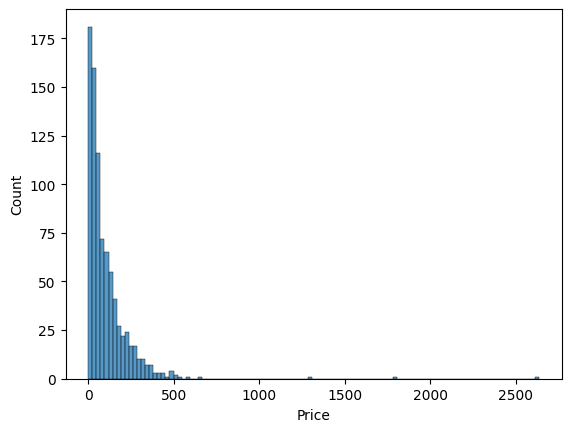

In [215]:
sns.histplot(df_sales_p['Price']) # plot distribution of price

In [216]:
df_sales_p[df_sales_p['Price']>500] #searching for outliers based on histogram

,Product,Region,Price,Units Sold,Sale Date
407,Product_27,Region_7,1793.90,9.0,2023-02-12
421,Product_34,Region_2,2636.90,14.0,2023-02-26
855,Product_40,NaN,570.60,14.0,2024-05-05
85,Product_44,Region_2,521.88,NaN,2022-03-27
269,Product_49,Region_8,1296.00,14.0,2022-09-27
745,Product_50,Region_10,650.50,6.0,2024-01-16
435,Product_50,Region_9,531.91,7.0,2023-03-12
737,Product_7,Region_10,501.57,17.0,2024-01-08


In [217]:
# dropping outliers (ask delina for a better approach)
df_noout_p = df_sales_p.set_index('Price').drop([1793.90,2636.90,570.60,521.88,1296.00,650.50,531.91,501.57]) 

<Axes: xlabel='Price', ylabel='Count'>

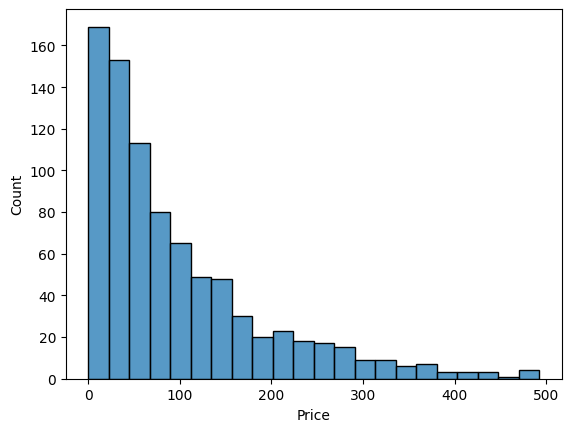

In [218]:
sns.histplot(df_noout_p.reset_index()['Price']) #plotting after removing outliers

In [219]:
df_noout_p

,Product,Region,Units Sold,Sale Date
Price,,,,
62.99,Product_1,Region_7,13.0,2022-10-28
50.97,Product_1,Region_6,NaN,2023-02-01
72.55,Product_1,Region_3,17.0,2022-03-25
42.74,Product_1,Region_6,11.0,2023-06-07
79.99,Product_1,Region_7,6.0,2024-03-18
...,...,...,...,...
177.28,Product_9,Region_6,NaN,2024-08-01
14.40,Product_9,Region_3,10.0,2022-05-19
7.01,Product_9,Region_10,8.0,2024-09-16


In [220]:
# reset index permanently
df_noout_p.reset_index(inplace=True)
df_noout_p

,Price,Product,Region,Units Sold,Sale Date
0,62.99,Product_1,Region_7,13.0,2022-10-28
1,50.97,Product_1,Region_6,NaN,2023-02-01
2,72.55,Product_1,Region_3,17.0,2022-03-25
3,42.74,Product_1,Region_6,11.0,2023-06-07
4,79.99,Product_1,Region_7,6.0,2024-03-18
...,...,...,...,...,...
934,177.28,Product_9,Region_6,NaN,2024-08-01
935,14.40,Product_9,Region_3,10.0,2022-05-19
936,7.01,Product_9,Region_10,8.0,2024-09-16
937,282.73,Product_9,Region_8,12.0,2022-01-25


In [221]:
# drop duplicates
df_noout_p.drop_duplicates(inplace=True)
df_noout_p.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 0 to 938
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       803 non-null    float64
 1   Product     892 non-null    object 
 2   Region      803 non-null    object 
 3   Units Sold  803 non-null    float64
 4   Sale Date   892 non-null    object 
dtypes: float64(2), object(3)
memory usage: 41.8+ KB


In [222]:
# filling in missing data
df_noout_p['Units Sold'] = df_noout_p['Units Sold'].fillna(df_noout_p.groupby('Product')['Units Sold'].transform('median'))
df_noout_p['Price'] = df_noout_p['Price'].fillna(df_noout_p.groupby('Product')['Price'].transform('median'))
df_noout_p.info()
#The dataset is now clean to carry out operations and analysis

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 0 to 938
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       892 non-null    float64
 1   Product     892 non-null    object 
 2   Region      803 non-null    object 
 3   Units Sold  892 non-null    float64
 4   Sale Date   892 non-null    object 
dtypes: float64(2), object(3)
memory usage: 41.8+ KB


In [223]:
df_price = df_noout_p['Price']
df_units_sold = df_noout_p['Units Sold']
df_sale_value_p = df_price*df_units_sold #defining new parameter sale value which is the product of the units sold and price
df_sale_value_p.info()

<class 'pandas.core.series.Series'>
Index: 892 entries, 0 to 938
Series name: None
Non-Null Count  Dtype  
--------------  -----  
892 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


In [224]:
df_noout_p['Sale Value']=df_sale_value_p
df_noout_p

,Price,Product,Region,Units Sold,Sale Date,Sale Value
0,62.99,Product_1,Region_7,13.0,2022-10-28,818.87
1,50.97,Product_1,Region_6,11.0,2023-02-01,560.67
2,72.55,Product_1,Region_3,17.0,2022-03-25,1233.35
3,42.74,Product_1,Region_6,11.0,2023-06-07,470.14
4,79.99,Product_1,Region_7,6.0,2024-03-18,479.94
...,...,...,...,...,...,...
933,44.34,Product_9,Region_6,10.0,2022-07-02,443.40
934,177.28,Product_9,Region_6,10.0,2024-08-01,1772.80
935,14.40,Product_9,Region_3,10.0,2022-05-19,144.00
936,7.01,Product_9,Region_10,8.0,2024-09-16,56.08


In [225]:
#grouping and adding sum of units sold and sale value based on product
df_grouped_p = df_noout_p.groupby('Product')[['Units Sold','Sale Value']].sum() 
df_grouped_p

,Units Sold,Sale Value
Product,,
Product_1,204.0,21585.805
Product_10,226.0,22304.420
Product_11,150.5,15763.515
Product_12,142.0,12742.430
Product_13,181.0,17092.720
Product_14,146.0,13860.240
Product_15,217.0,18634.340
Product_16,162.5,9969.110
Product_17,206.0,23941.290


In [226]:
# Finding the product with Maximum Units Sold
df_grouped_p[df_grouped_p['Units Sold'] == df_grouped_p['Units Sold'].max()]

,Units Sold,Sale Value
Product,,
Product_24,300.0,18550.15


In [227]:
# Finding the product with Maximum Sale Value
df_grouped_p[df_grouped_p['Sale Value'] == df_grouped_p['Sale Value'].max()]

,Units Sold,Sale Value
Product,,
Product_23,238.0,33236.91


In [228]:
# Finding the product with Minimum Units Sold
df_grouped_p[df_grouped_p['Units Sold'] == df_grouped_p['Units Sold'].min()]

,Units Sold,Sale Value
Product,,
Product_39,96.0,9061.96


In [229]:
# Finding the product with Minimum Sale Value
df_grouped_p[df_grouped_p['Sale Value'] == df_grouped_p['Sale Value'].min()]

,Units Sold,Sale Value
Product,,
Product_35,139.5,6680.16


In [230]:
#grouping and adding sum of units sold and sale value based on Region
df_grouped_r = df_noout_p.groupby('Region')[['Units Sold','Sale Value']].sum() 
df_grouped_r

,Units Sold,Sale Value
Region,,
Region_1,790.0,78968.365
Region_10,786.0,78319.740
Region_2,817.5,81501.750
Region_3,747.5,62449.980
Region_4,782.0,68497.570
Region_5,948.5,96675.145
Region_6,773.0,82839.580
Region_7,851.0,61881.365
Region_8,837.5,81058.860


In [231]:
# Finding the Region with Maximum Units Sold
df_grouped_r[df_grouped_r['Units Sold'] == df_grouped_r['Units Sold'].max()]

,Units Sold,Sale Value
Region,,
Region_5,948.5,96675.145


In [232]:
# Finding the Region with Maximum Sale Value
df_grouped_r[df_grouped_r['Sale Value'] == df_grouped_r['Sale Value'].max()]

,Units Sold,Sale Value
Region,,
Region_5,948.5,96675.145


In [233]:
# Finding the Region with Minimum Units Sold
df_grouped_r[df_grouped_r['Units Sold'] == df_grouped_r['Units Sold'].min()]

,Units Sold,Sale Value
Region,,
Region_3,747.5,62449.98


In [234]:
# Finding the Region with Minimum Sale Value
df_grouped_r[df_grouped_r['Sale Value'] == df_grouped_r['Sale Value'].min()]

,Units Sold,Sale Value
Region,,
Region_7,851.0,61881.365


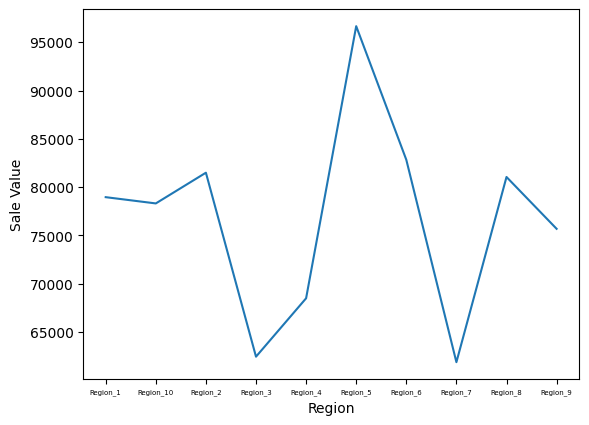

In [235]:
sns.lineplot(x='Region',y='Sale Value',data=df_grouped_r.reset_index())
plt.xticks(fontsize=5)
plt.show()

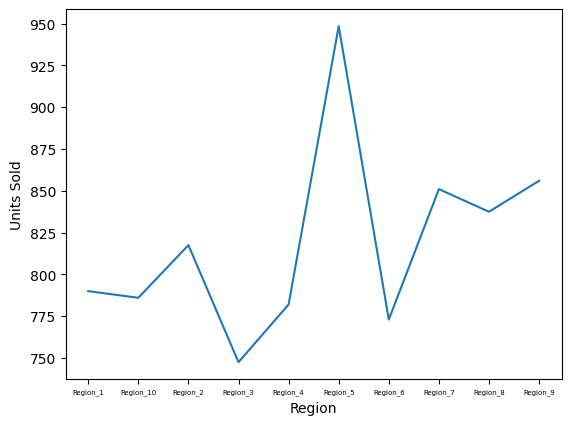

In [236]:
sns.lineplot(x='Region',y='Units Sold',data=df_grouped_r.reset_index())
plt.xticks(fontsize=5)
plt.show()

Assignment Questions
1) What conclusions can you draw about sales performance of various products and regions?

Ans : As per the analysis of the clean data set-

     a) Based on Product -
     i) Product_24 is the most popular product since it has the maximum number of Units Sold
     ii) Product_23 brings in the maximum revenue since it has the highest Sale Value
     iii) Product_39 is the least popular product since it has the least number of Units Sold
     iv) Product_35 brings in the minimum revenue since it has the lowest Sale Value

     b) Based on Region -
     i) Region_5 is the best performing region in terms of number of Units Sold as well as Sale Value
     ii) Region_3 is the worst performing region in terms of number of Units Sold
     iii) Region_7 brings in the least revenue since it has the lowest Sale Value


2) What recommendations do you have for the business?

Ans : Key recommendations for the business-

a) Increase the average Price of Product_24 - Since this is most selling product(highest demand), increasing its average price would significantly increase the Sale Value i.e. the revenue it generates.

b) Conduct customer surveys on worst performing products like Product_39 and Product_35 to gather more data and understand the issues faced. Devise and execute strategies to counteract the identified problems.

c) Increase supply of products in Region_5 - Since this best performing region in terms of both number of Units Sold as well as Sale Value generated, it shows that the demand of products is also the maximum in this region. To leverage this, the business should open new shops/outlets in this region as well as deploy more resources to meet the demand of the products thus increasing the revenue generated.

d) Conduct customer surveys on worst regions like Region_3 and Region_7 to gather more data and understand the issues faced. Devise and execute strategies to counteract the identified problems.


3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

Ans : The data cleaning for the given dataset was implemented by following some of the standard steps and taking corrective actions based on visualizing the attributes of the data after each step. The steps were as follows:

i) Sorting the data based on Product column - The dataset had highest number of entries in the Product column(after Sale Date) but the rows were populated in a random order. It became necessary to have a sorted dataset based on the Product column to get a better undersatnding. The statement "df_sales_p=df_sales.sort_values('Product',ascending=True)" was executed to sort the data.

ii) Droping all rows with missing data based on Product Column - Removal of incomplete data is an important step towards cleaning it. The statement "df_sales_p.dropna(subset='Product',inplace=True)" used executed to remove all imcomplete rows based on the Product Column.

iii) Average Price by Product - After dropping the rows with missing data, the dataset was grouped based on Product and the average Price of each product was calcuated. This was done to get a general idea of the prices of products since the same products have different prices of each transaction. The statement "df_sales_p.groupby('Product')['Price'].mean()" was executed.

iv) Plotting Frequency Distribution of Price - For determing the threshold value to identify outliers, it became necessry to visually represent the frequency distribution of price using a Histogram. The statment "sns.histplot(df_sales_p['Price'])" was used to plot the histogram.

v) Searching for outliers based on histogram - This step was carried out to find out the outliers based on the threshold value identified via the histogram in the previous step. The statement "df_sales_p[df_sales_p['Price']>500]" was executed to find the outliers.

vi) Dropping outliers- After identifying the outliers, they have to dropped from the data set. The statement "df_noout_p = df_sales_p.set_index('Price').drop([1793.90,2636.90,570.60,521.88,1296.00,650.50,531.91,501.57])" was executed to achive this.

vii) Plotting after removing outliers - To cross-verify our process of removing outliers, we plot the histogram once again. The statment "sns.histplot(df_noout_p['Price'])" was used.

viii) Dropping duplicates- the next step is to drop all the duplicate data rows since their existence was cause inaccurate analyis. The statement "df_noout_p.drop_duplicates(inplace=True)" was used.

ix) Filling in missing data - It was observed that there is still come missing data in rows containing numerical values - Units Sold and Price. To ensure consistent data for analysis, it becomes necessary to populate the data based on their respective median values. The statements , "df_noout_p['Units Sold'] = df_noout_p['Units Sold'].fillna(df_noout_p.groupby('Product')['Units Sold'].transform('median'))" and " df_noout_p['Price'] = df_noout_p['Price'].fillna(df_noout_p.groupby('Product')['Price'].transform('median'))" were executed.